### Problem Statement
Introduction
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

  

### Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
 

### Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 130, 'display.max_columns', 130)
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("loan.csv")

In [3]:
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [4]:
# dropping all the column having 100% empty cells
df.dropna(how='all', axis=1, inplace=True)

In [5]:
# droping column which are not requiered for this case studies
df.drop(columns= [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"], axis=1, inplace=True
)

In [6]:
# We will remove the applicant whose status is current as they still paying the emi on time
df = df[df["loan_status"]!="Current"]
df = df.loc[:,df.nunique()!=1]

In [7]:
## Check percentage of missing data
((df.isnull().sum() * 100 / len(df)).sort_values(
    ascending=False))

next_pymnt_d             100.00
mths_since_last_record    92.90
mths_since_last_delinq    64.56
desc                      32.47
emp_title                  6.19
emp_length                 2.68
pub_rec_bankruptcies       1.81
title                      0.03
issue_d                    0.00
dti                        0.00
addr_state                 0.00
zip_code                   0.00
purpose                    0.00
url                        0.00
loan_status                0.00
id                         0.00
member_id                  0.00
annual_inc                 0.00
home_ownership             0.00
sub_grade                  0.00
grade                      0.00
installment                0.00
int_rate                   0.00
term                       0.00
funded_amnt_inv            0.00
funded_amnt                0.00
loan_amnt                  0.00
verification_status        0.00
dtype: float64

In [8]:
# droping three column as they have more than 30 % missing data
df.drop(
    columns=[
        "desc",
        "next_pymnt_d",
        "mths_since_last_record",
        "mths_since_last_delinq"], axis=1, inplace=True)

In [9]:
print(df.pub_rec_bankruptcies.median())
df["pub_rec_bankruptcies"].describe()

0.0


count   37,880.00
mean         0.04
std          0.20
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          2.00
Name: pub_rec_bankruptcies, dtype: float64

In [10]:
#filling missing values with median
df['pub_rec_bankruptcies'].fillna(df.pub_rec_bankruptcies.median(), inplace=True)

In [11]:
((df.isnull().sum() * 100 / len(df)).sort_values(
    ascending=False))

emp_title              6.19
emp_length             2.68
title                  0.03
id                     0.00
annual_inc             0.00
dti                    0.00
addr_state             0.00
zip_code               0.00
purpose                0.00
url                    0.00
loan_status            0.00
issue_d                0.00
verification_status    0.00
home_ownership         0.00
member_id              0.00
sub_grade              0.00
grade                  0.00
installment            0.00
int_rate               0.00
term                   0.00
funded_amnt_inv        0.00
funded_amnt            0.00
loan_amnt              0.00
pub_rec_bankruptcies   0.00
dtype: float64

In [12]:
df["dti"].describe()

count   38,577.00
mean        13.27
std          6.67
min          0.00
25%          8.13
50%         13.37
75%         18.56
max         29.99
Name: dti, dtype: float64

In [13]:
df["emp_title"].nunique()

28027

In [14]:
# Deleting string columns having most of unique values
df.drop(columns=["emp_title", "title"], axis=1, inplace=True)

In [50]:
cols = ['annual_inc'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [15]:
df.shape

(38577, 22)

## Creating Derived variable and performing univariate analysis

In [16]:
def between(n, l_tupl, number=True):
    for tupl in l_tupl:
        if number:
            if n > tupl[0] and n <= tupl[1]:
                return tupl
        else:
            if n in tupl:
                return tupl

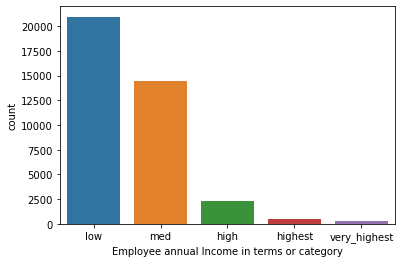

low : (0, 5000)
med : (5000, 10000)
high : (10000, 15000)
highest : (15000, 20000)
very_highest : (20000, 90000)


In [17]:
# As using the annual_income directly will not make any sence, so we will classify into group by beaning
category = {(0,5000): "low", (5000, 10000): "med", (10000, 15000): "high", (15000, 20000): "highest", (20000, 90000): "very_highest"}
df["annual_inc_category"] = df["annual_inc"].apply(lambda x: category.get(between(x//12, category.keys())))
sns.countplot(x='annual_inc_category', data=df)
plt.xlabel("Employee annual Income in terms or category")
plt.show()
print("\n".join([f"{value} : {key}" for key, value in category.items()]))

Inference: Most of employes applying loan has low salery i.e between 500 to 5000

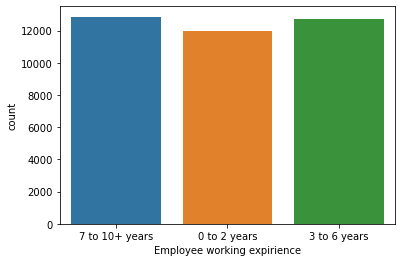

0 to 2 years : ('< 1 year', '1 year', '2 years')
3 to 6 years : ('3 years', '4 years', '5 years', '6 years')
7 to 10+ years : ('7 years', '8 years', '9 years', '10+ years')


In [18]:
#binning emp_length
employement_category={
    ('< 1 year', '1 year', '2 years'): "0 to 2 years",
    ('3 years', '4 years', '5 years', '6 years'): "3 to 6 years",
    ('7 years', '8 years', '9 years', '10+ years'): "7 to 10+ years"
}
df["emp_length_category"] = df["emp_length"].apply(
    lambda x: employement_category.get(between(x, employement_category.keys(), number=False))
)
sns.countplot(x='emp_length_category', data=df)
plt.xlabel("Employee working expirience")
plt.show()
print("\n".join([f"{value} : {key}" for key, value in employement_category.items()]))

In [19]:
#actual employee lenght
df['emp_exp'] = df['emp_length'].str.rstrip('years ')
df['emp_exp'].replace({'10+': '10'}, inplace=True)
df['emp_exp'].replace({'< 1': '0.5'}, inplace=True)
df['emp_exp'] = df['emp_exp'].astype(float)

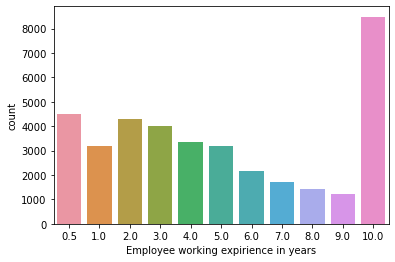

In [20]:
sns.countplot(x='emp_exp', data=df)
plt.xlabel("Employee working expirience in years")
plt.show()

Inference: Most of emplyees applying working experience in 10+ years

In [21]:
df["int_rate_num"] = df['int_rate'].apply(lambda x: float(x.replace("%", '')))

In [22]:
df["int_rate_num"].describe()

count   38,577.00
mean        11.93
std          3.69
min          5.42
25%          8.94
50%         11.71
75%         14.38
max         24.40
Name: int_rate_num, dtype: float64

med        18265
low        12316
high        4638
highest      341
Name: int_rate_category, dtype: int64


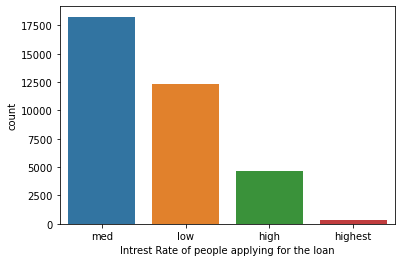

low : (0, 10)
med : (10, 15)
high : (16, 20)
highest : (21, 30)


In [23]:
#binning intrest rate
int_rate_category = {
    (0,10): "low",
    (10,15): "med",
    (16,20): "high",
    (21, 30): "highest"
}
df["int_rate_category"] = df["int_rate_num"].apply(
    lambda x: int_rate_category.get(between(x, int_rate_category.keys()))
)
print(df["int_rate_category"].value_counts())
sns.countplot(x="int_rate_category", data=df)
plt.xlabel("Intrest Rate of people applying for the loan")
plt.show()
print("\n".join([f"{value} : {key}" for key, value in int_rate_category.items()]))

Inference: Most of people applying for the loan are from med intrest rate category i.e between 10, 15 %

low        22274
medium     12032
high        3536
highest      735
Name: loan_amt_categoty, dtype: int64


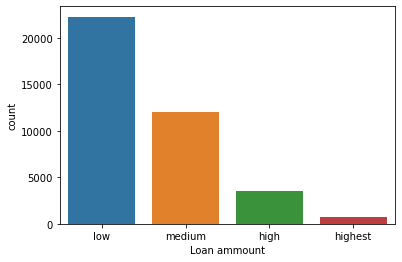

low : (0, 10000)
medium : (10000, 20000)
high : (20000, 30000)
highest : (30000, 50000)


In [24]:
# binning loan_amnt
loan_amnt_category = {
    (0, 10000): "low",
    (10000, 20000): "medium",
    (20000,30000): "high",
    (30000, 50000): "highest"
}
df["loan_amt_categoty"] = df["loan_amnt"].apply(
    lambda x: loan_amnt_category.get(
        between(x, loan_amnt_category.keys())))
print(df["loan_amt_categoty"].value_counts())
sns.countplot(x="loan_amt_categoty", data=df)
plt.xlabel("Loan ammount")
plt.show()
print(
    "\n".join(
        [f"{value} : {key}" for key, value in loan_amnt_category.items()]))

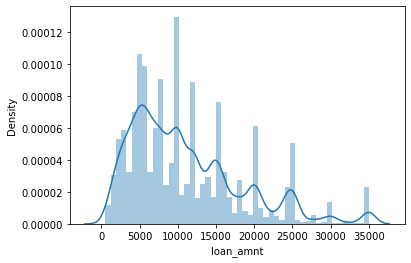

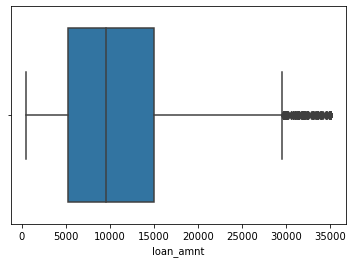

In [46]:
sns.distplot(df["loan_amnt"])
plt.show()
sns.boxplot(x=df["loan_amnt"])
plt.show()

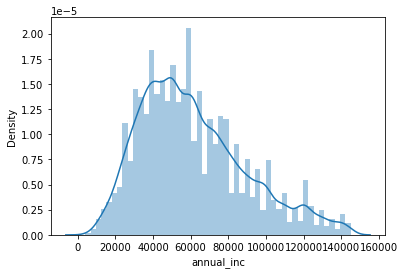

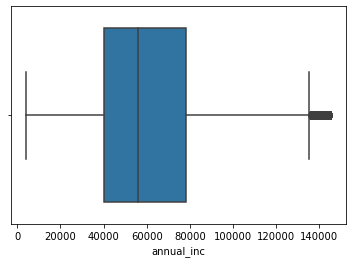

In [52]:
sns.distplot(df["annual_inc"])
plt.show()
sns.boxplot(x=df["annual_inc"])
plt.show()

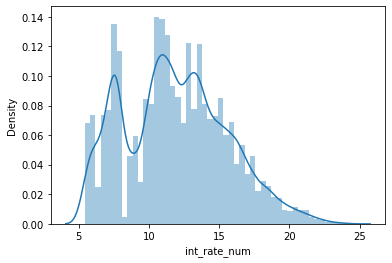

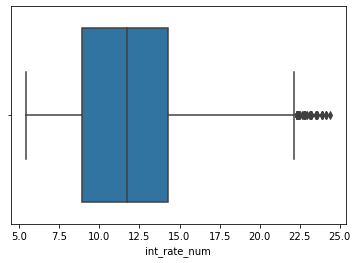

In [53]:
sns.distplot(df["int_rate_num"])
plt.show()
sns.boxplot(x=df["int_rate_num"])
plt.show()

 36 months    29096
 60 months     9481
Name: term, dtype: int64


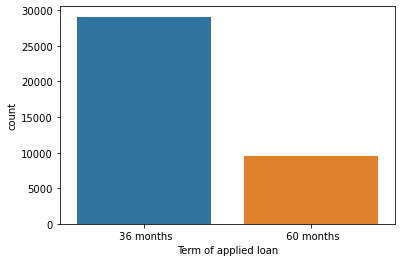

In [26]:
#loan term
print(df["term"].value_counts())
sns.countplot(x="term", data=df)
plt.xlabel("Term of applied loan")
plt.show()

In [27]:
df["funded_amnt"].describe()

count   38,577.00
mean    10,784.06
std      7,090.31
min        500.00
25%      5,200.00
50%      9,550.00
75%     15,000.00
max     35,000.00
Name: funded_amnt, dtype: float64

med          12997
low           9555
very high     8155
high          7870
Name: funded_amnt_category, dtype: int64


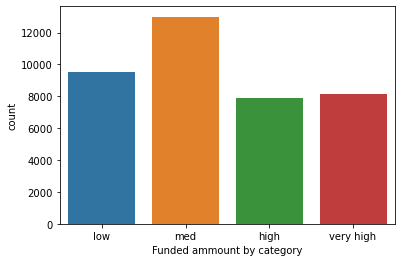

low : (0, 10000)
medium : (10000, 20000)
high : (20000, 30000)
highest : (30000, 50000)


In [28]:
# funded_amnt bin
funded_amnt_category = {
    (400, 5000): "low",
    (5000, 10000): "med",
    (10000, 15000): "high",
    (15000, 50000): "very high"
}
df["funded_amnt_category"] = df["funded_amnt"].apply(
    lambda x: funded_amnt_category.get(between(x, funded_amnt_category.keys())))
print(df["funded_amnt_category"].value_counts())
sns.countplot(x="funded_amnt_category", data=df)
plt.xlabel("Funded ammount by category")
plt.show()
print(
    "\n".join(
        [f"{value} : {key}" for key, value in loan_amnt_category.items()]))

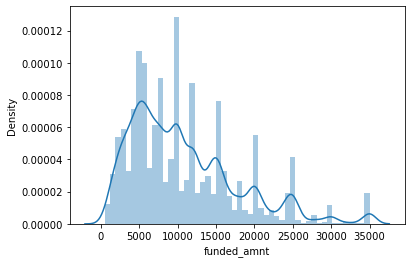

<AxesSubplot:xlabel='funded_amnt', ylabel='Count'>

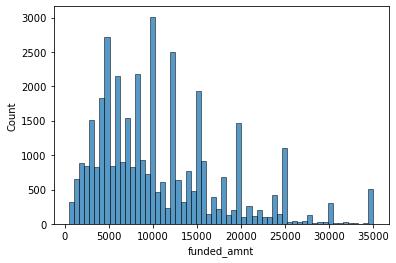

In [29]:
sns.distplot(df["funded_amnt"])
plt.show()

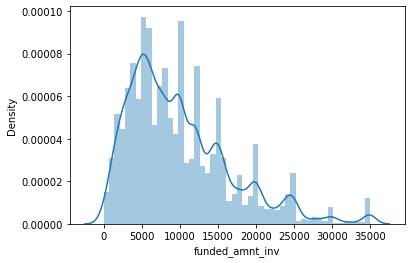

In [54]:
sns.distplot(df["funded_amnt_inv"])
plt.show()

Inference: Funded amount is left skewed. Most of the loan amount given is 5 to 10 lakhs

In [30]:
df["funded_amnt_inv"].describe()

count   38,577.00
mean    10,222.48
std      7,022.72
min          0.00
25%      5,000.00
50%      8,733.44
75%     14,000.00
max     35,000.00
Name: funded_amnt_inv, dtype: float64

med          12757
low          10438
high          7617
very high     7502
Name: funded_amnt_inv_category, dtype: int64


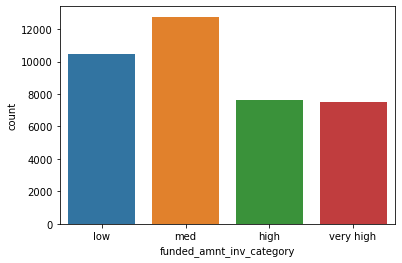

In [31]:
# funded_amnt_inv binning
funded_amnt_inv_category = {
    (0, 5000): "low",
    (5000, 10000): "med",
    (10000, 15000): "high",
    (15000, 50000): "very high"
}
df["funded_amnt_inv_category"] = df["funded_amnt_inv"].apply(
    lambda x: funded_amnt_category.get(between(x, funded_amnt_category.keys())))
print(df["funded_amnt_inv_category"].value_counts())
sns.countplot(x="funded_amnt_inv_category", data=df)
plt.show()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64


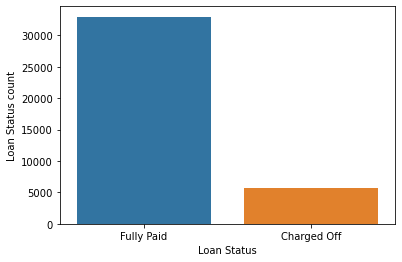

In [44]:
print(df["loan_status"].value_counts())
sns.countplot(x="loan_status", data=df)
plt.xlabel("Loan Status")
plt.ylabel("Loan Status count")
plt.show()

## Bivariate analysis

<AxesSubplot:title={'center':'Default'}, xlabel='loan_status', ylabel='funded_amnt'>

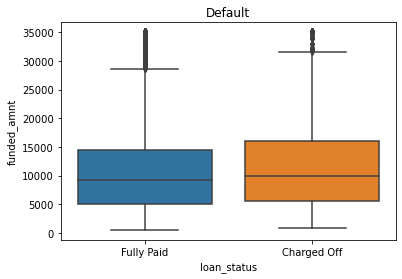

In [32]:
#Relationship of Funded Amount with loan status
plt.title('Default')
sns.boxplot(y='funded_amnt', x='loan_status', data=df)

Inference: 75 percentile of funded ammount for loan status charged of slightly High than Fully paid

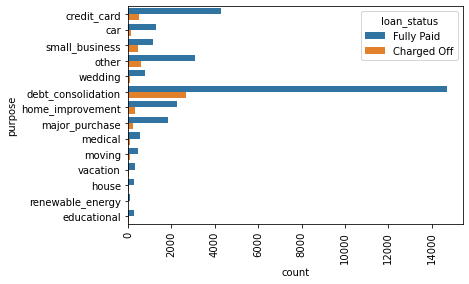

In [62]:
sns.countplot(y="purpose", hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.show()

In [57]:
# Loan Status agianst few Group analysis to analyze CHARGED OFF status

inc_range_vs_loan = df.groupby(['annual_inc_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_category,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,low,3480,17482,20962,0.17
2,med,1799,12663,14462,0.12
0,high,152,1239,1391,0.11


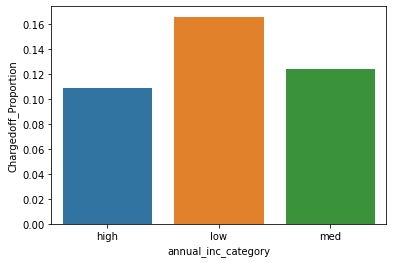

In [60]:
# Create Bar Plot for the Charged OFF data with respect to Annual Income Category 

ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='annual_inc_category', y='Chargedoff_Proportion', data=inc_range_vs_loan)
plt.show()

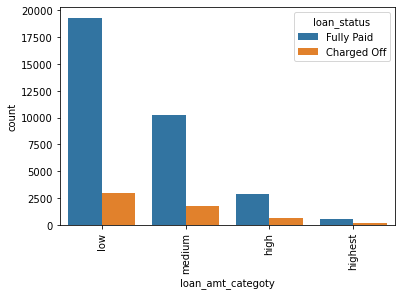

In [34]:
sns.countplot(x="loan_amt_categoty", hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.show()

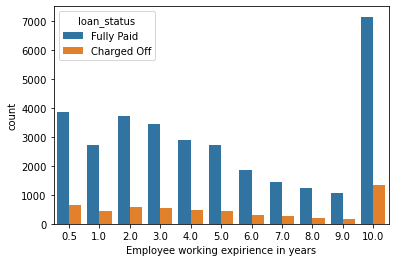

In [35]:
sns.countplot(x='emp_exp', hue="loan_status",data=df)
plt.xlabel("Employee working expirience in years")
plt.show()

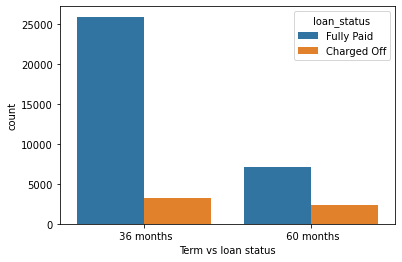

In [36]:
sns.countplot(x='term', hue="loan_status",data=df)
plt.xlabel("Term vs loan status")
plt.show()

Inference: % of charged of( defaulter) is more for 60 months as compare to 36 months

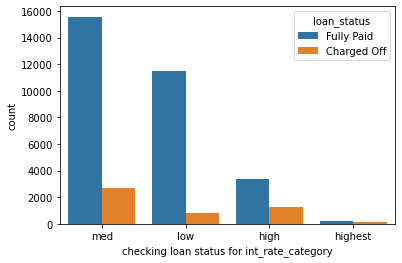

In [37]:
sns.countplot(x='int_rate_category', hue="loan_status",data=df)
plt.xlabel("checking loan status for int_rate_category")
plt.show()

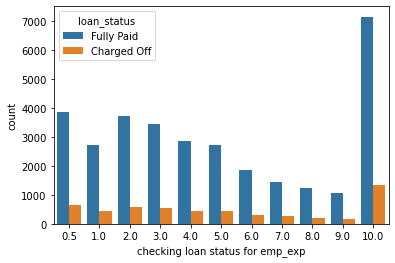

In [38]:
sns.countplot(x='emp_exp', hue="loan_status",data=df)
plt.xlabel("checking loan status for emp_exp")
plt.show()

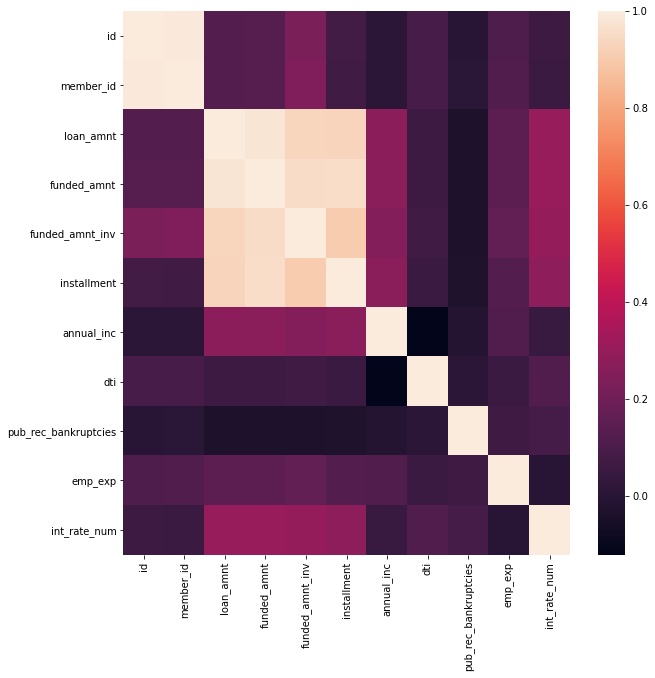

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

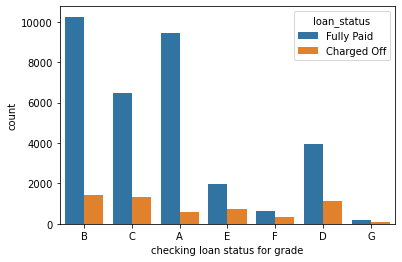

In [40]:
sns.countplot(x='grade', hue="loan_status",data=df)
plt.xlabel("checking loan status for grade")
plt.show()

In [41]:
df['loan_inc_ratio'] = df.funded_amnt*100/df.annual_inc

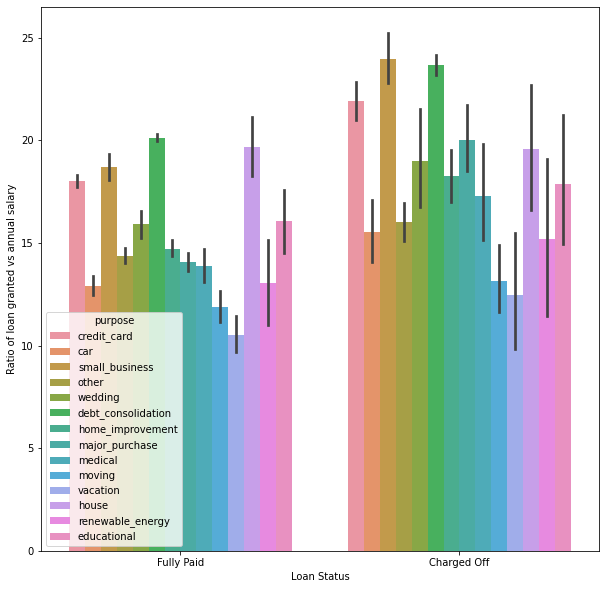

In [42]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=df)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

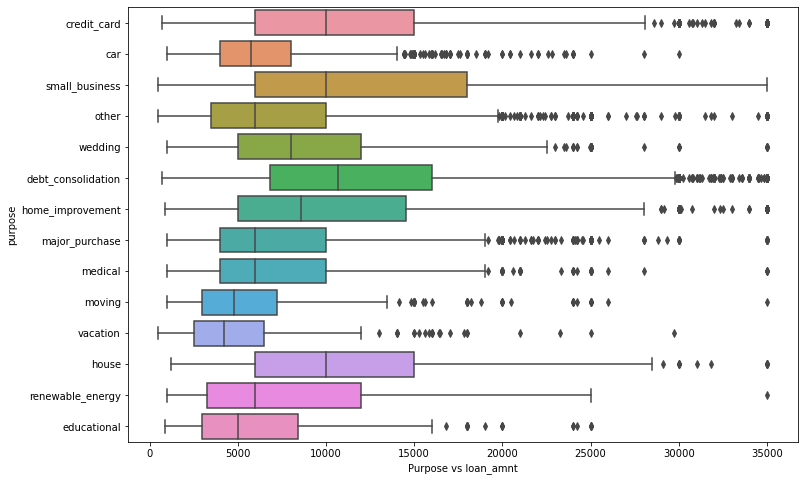

In [70]:
plt.figure(figsize=(12,8))
sns.boxplot(x='loan_amnt', y='purpose',data=df)
plt.xlabel("Purpose vs loan_amnt")
plt.show()

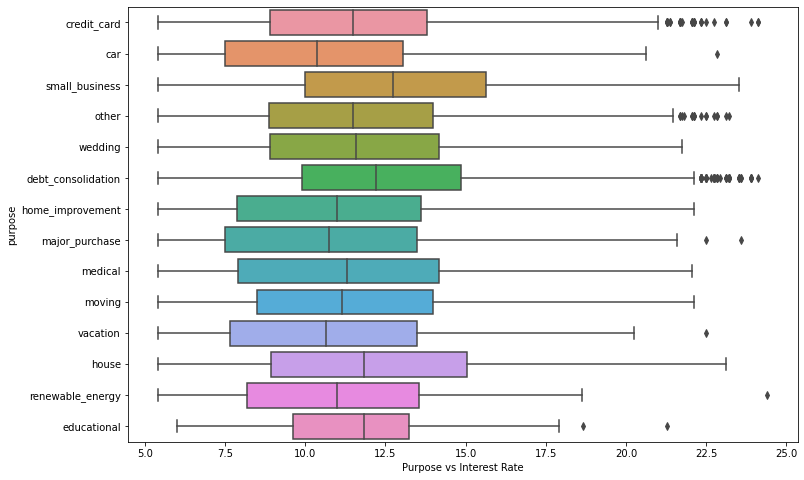

In [71]:
plt.figure(figsize=(12,8))
sns.boxplot(x='int_rate_num', y='purpose',data=df)
plt.xlabel("Purpose vs Interest Rate")
plt.show()

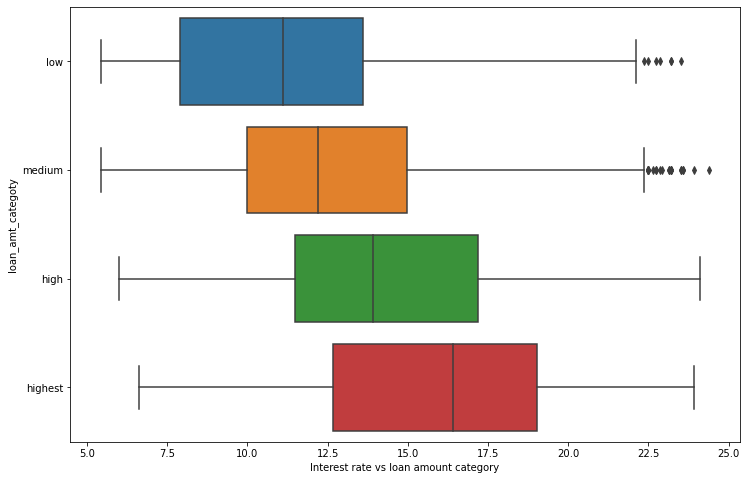

In [72]:
plt.figure(figsize=(12,8))
sns.boxplot(x='int_rate_num', y='loan_amt_categoty', data=df)
plt.xlabel("Interest rate vs loan amount category")
plt.show()